# Derivación numérica: diferencias finitas

### NOTA
Este notebook se iniciará en la clase; la resolución completa debe ser enviada como "Tarea3.ipynb", desde su carpeta de tareas. Se puede hacer en equipo, con un máximo de dos personas. Si se hace en equipo, incluyan ambos nombres de manera clara.

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la definición de la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

que requiere la especificación de `h`. (Este método se conoce por el nombre de *diferencias finitas*.)

A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). (Para ser concretos, obtengan la derivada de la función de prueba $f(x) = 3x^3-2$, en $x_0=1$.) Dibujen, como función de $h$, el error de su cálculo (usar escala logarítmica en ambos ejes puede ser una buena idea). A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada? 


In [19]:
f(x)=3*x^3-2

f (generic function with 1 method)

In [20]:
f´(x)=9*x^2

f´ (generic function with 1 method)

In [21]:
"""
derivada_derecha(f = función,h = diferencia,x_0 = punto de evaluación)
Esta función calcula la derivada derecha de una función f en el punto x_0. Los argumentos son una función arbiraria f
la diferencia h y el punto de evaluación x_0 como argumento opcional. Por defecto, x_0=0.0.
"""
function derivada_derecha(f::Function, h :: Real, x_0=0.0)
    return(f(x_0+h)-f(x_0))/h
end

derivada_derecha (generic function with 2 methods)

In [22]:
derivada_derecha(f,.001,1) #prueba de evaluación

9.009002999998295

In [23]:
f´(1)

9

In [24]:
"""
datos_error(f= función,g = derivada,x0 = punto de evaluación,n_num= número de evaluaciones)

Calcula el error en valor absoluto entre la derivada derecha de una función y su derivada exacta, ambas evaluadas en x0. 
El valor de h cambia logarítmicamente entre 10^-15 y 1, con un total de n_num de puntos para calcular el error
"""
function datos_error(fun::Function, der::Function, x_0 = 0.0, n_num = 100)
    h=logspace(-15,0,n_num)
    y=zeros(h)
    for i in 1:n_num
        y[i]=abs(derivada_derecha(fun,h[i],x_0)-der(x_0)) 
    end
    return y
end

datos_error (generic function with 3 methods)

In [25]:
y=datos_error(f,f´,1,100)
x=logspace(-15,0,length(y))

100-element Array{Float64,1}:
 1.0e-15    
 1.41747e-15
 2.00923e-15
 2.84804e-15
 4.03702e-15
 5.72237e-15
 8.11131e-15
 1.14976e-14
 1.62975e-14
 2.31013e-14
 3.27455e-14
 4.64159e-14
 6.57933e-14
 ⋮          
 0.0215443  
 0.0305386  
 0.0432876  
 0.0613591  
 0.0869749  
 0.123285   
 0.174753   
 0.247708   
 0.351119   
 0.497702   
 0.70548    
 1.0        

In [26]:
using PyPlot

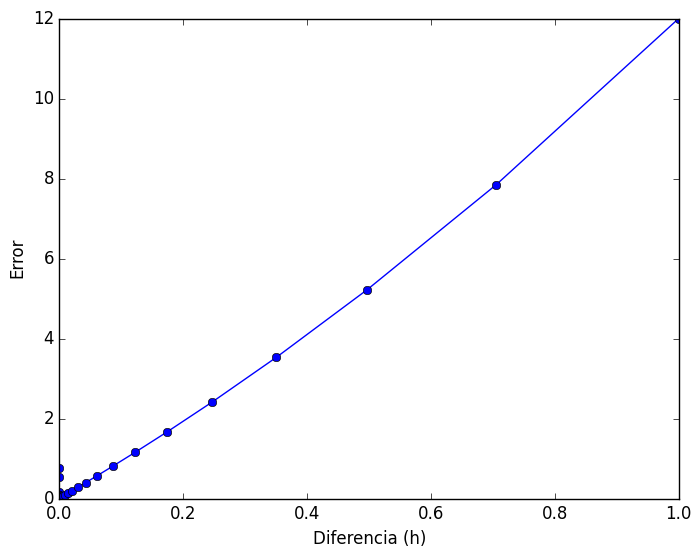

In [42]:
plot(x,y, marker="o")
xlabel("Diferencia (h)")
ylabel("Error")
legend()
#savefig("test.png")

Podemos ver que la gráfica corresponde a una cuadrática, al menos para valores de h suficientemente grandes. Este resultado tiene sentido, ya que el error en nuestro cálculo se puede hallar de la siguiente manera:
$$
\frac{f(x+h)-f(x)}{h}  =  \frac{3(x+h)^3-2-(3x^3-2)}{h}  =  \frac{3(3x^2h+3xh^2+h^3)}{h}  =  9x^2+9xh+3h^2
$$

Ahora, al restar la derivada de esta expresión se obtiene que el error en la derivada derecha está dado por:

$$e(x,h)\ =\ \frac{f(x+h)-f(x)}{h}-\ f'(x)\ =\ 9x^2+9xh+3h^2-9x^2\ =\ 9xh+3h^2$$

Esto significa que el error tiene una dependencia cuadrática en h y, por tanto debe describir una parábola. A continuación se grafica el resultado en una gráfica log-log.

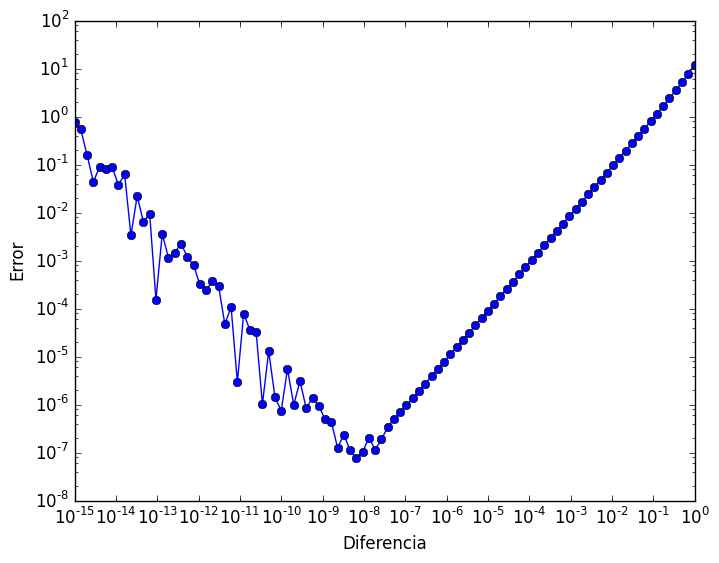

In [28]:
loglog(x,y, marker="o")
xlabel("Diferencia (h)")
ylabel("Error")
legend()


## Derivada simétrica

Repitan el ejercicio anterior usando cómo definición de la derivada la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}



In [29]:
"""
derivada_simetrica(f = función,h = diferencia,x_0 = punto de evaluación)
Esta función calcula la derivada simétrica de una función f en el punto x_0. Los argumentos son una función arbiraria f
la diferencia h y el punto de evaluación x_0 como argumento opcional. Por defecto, x_0=0.0.
"""
function derivada_simetrica(f::Function, h :: Real, x_0=0.0)
    return(f(x_0+h)-f(x_0-h))/(2*h)
end

derivada_simetrica (generic function with 2 methods)

In [30]:
derivada_simetrica(f,0.1,1),f´(1) #prueba de evaluación

(9.030000000000005,9)

In [31]:
derivada_simetrica(f,0.1,1),derivada_derecha(f,0.1,1) #comparación de los métodos

(9.030000000000005,9.930000000000012)

In [32]:
"""
datos_error_sim(f= función,g = derivada,x0 = punto de evaluación,n_num= número de evaluaciones)

Calcula el error en valor absoluto entre la derivada simétrica de una función y su derivada exacta, ambas evaluadas en x0. 
El valor de h cambia logarítmicamente entre 10^-15 y 1, con un total de n_num de puntos para calcular el error
"""
function datos_error_sim(fun::Function, der::Function, x_0 = 0.0, n_num = 100)
    h=logspace(-15,0,n_num)
    y=zeros(h)
    for i in 1:n_num
        y[i]=abs(derivada_simetrica(fun,h[i],x_0)-der(x_0)) 
    end
    return y
end

datos_error_sim (generic function with 3 methods)

In [33]:
z=datos_error_sim(f,f´,1,100)
y=datos_error(f,f´,1,100)
x=logspace(-15,0,length(y));

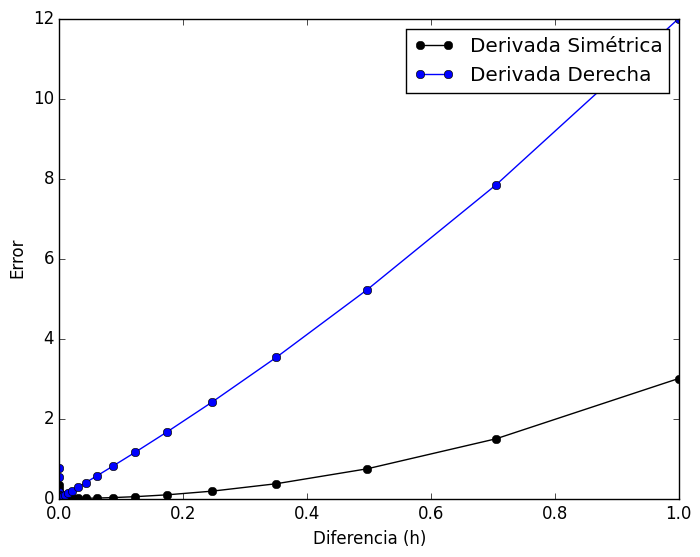

PyObject <matplotlib.legend.Legend object at 0x000000001B568F98>

In [43]:
plot(x,z, marker="o",color="black",label="Derivada Simétrica")
plot(x,y, marker="o",color="blue",label="Derivada Derecha")
xlabel("Diferencia (h)")
ylabel("Error")
legend()

En este caso se obtiene que el error esta dado por:

$$e(x,h)\ =\ \frac{f(x+h)-f(x-h)}{2h}-\ f'(x)\ =\ \frac{3(6x^2h+2h^3)}{2h}-9x^2\ =\ 3h^2$$

Por tanto, también en este caso, el error tiene una dependencia cuadrática en h y, por tanto debe describir una parábola. Sinembargo, a diferencia de el caso anterior, esta no depende de x. A continuación se grafica el resultado en una gráfica log-log, donde se puede apreciar que el error es mucho menor en la derivada derecha, al menos en un principio. 

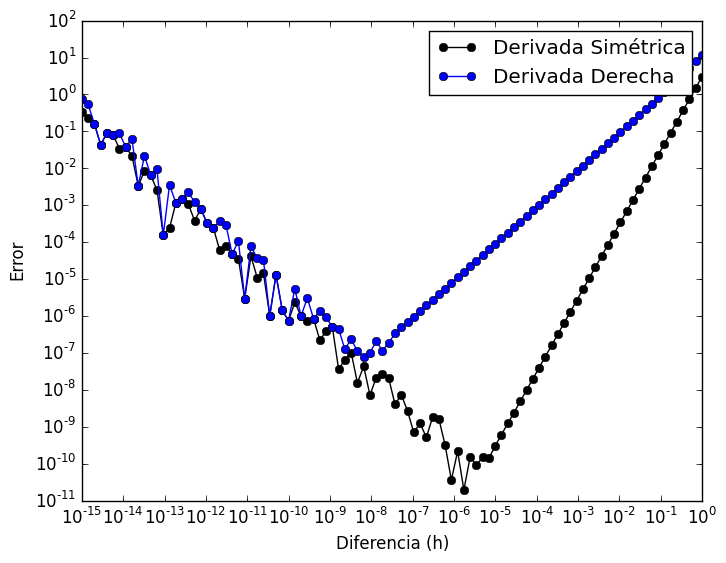

PyObject <matplotlib.legend.Legend object at 0x000000001C401630>

In [44]:
loglog(x,z, marker="o",color="black",label="Derivada Simétrica")
loglog(x,y, marker="o",color="blue",label="Derivada Derecha")
xlabel("Diferencia (h)")
ylabel("Error")
legend()

Se observa que el valor de la derivada simétrica disminuye más rápido que el de la derivada derecha pues no tiene el término adicional $9xh$. Sin embargo, a partir de cierto punto el error numérico en las operaciones comienza a ser relevante y la diferencia con el valor de la derivada exacta empieza a aumentar. Se puede observar que el error se comporta de manera similar para valores de $h$ menores a $10^-9$. Esto se puede atribuir, en parte, a que ambos cálculos utilizan valores flotantes de la misma precisión: `Float64`

## Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Así, tenemos la definición:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [36]:
"""
derivada_compleja(f = función,h = diferencia,x_0 = punto de evaluación)
Esta función calcula la derivada compleja de una función real f de variable real en el punto x_0 al extenderla a los
números complejos y guardar la parte imaginaria. Los argumentos son una función arbiraria f
la diferencia h y el punto de evaluación x_0 como argumento opcional. Por defecto, x_0=0.0.
"""
function derivada_compleja(f::Function, h :: Real, x_0=0.0)
    return imag(f(x_0+h*im)/h)
end

derivada_compleja (generic function with 2 methods)

In [37]:
g(x)=sin(x)
g´(x)=cos(x)
derivada_compleja(g,0.0001,0),cos(0) #ejemplo de evaluación

(1.0000000016666666,1.0)

In [70]:
"""
datos_error_comp(f= función,g = derivada,x0 = punto de evaluación,n_num= número de evaluaciones)

Calcula el error en valor absoluto entre la derivada compleja de una función f como se define arriba y su derivada exacta g,
ambas evaluadas en x0. El valor de h cambia logarítmicamente entre 10^-15 y 1, con un total de n_num de puntos para 
calcular el error.
"""
function datos_error_comp(fun::Function, der::Function, x_0 = 0.0, n_num = 100)
    h=logspace(-15,0,n_num)
    y=zeros(h)
    for i in 1:n_num
        y[i]=abs(derivada_compleja(fun,h[i],x_0)-der(x_0)) 
    end
    return y
end

datos_error_comp (generic function with 3 methods)

In [71]:
w=datos_error_comp(f,f´,1,100)
z=datos_error_sim(f,f´,1,100)
y=datos_error(f,f´,1,100)
x=logspace(-15,0,length(w));

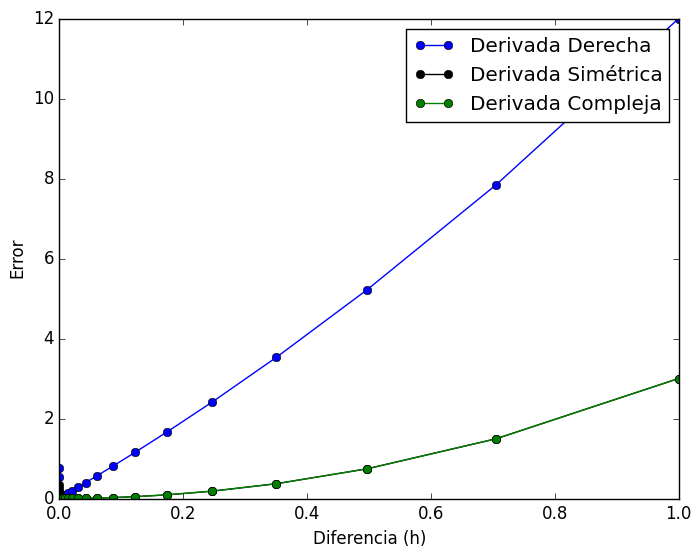

PyObject <matplotlib.legend.Legend object at 0x0000000021CA5D30>

In [72]:
plot(x,y, marker="o",color="blue",label="Derivada Derecha")
plot(x,z, marker="o",color="black",label="Derivada Simétrica")
plot(x,w, marker="o",color="green",label="Derivada Compleja")
xlabel("Diferencia (h)")
ylabel("Error")
legend()

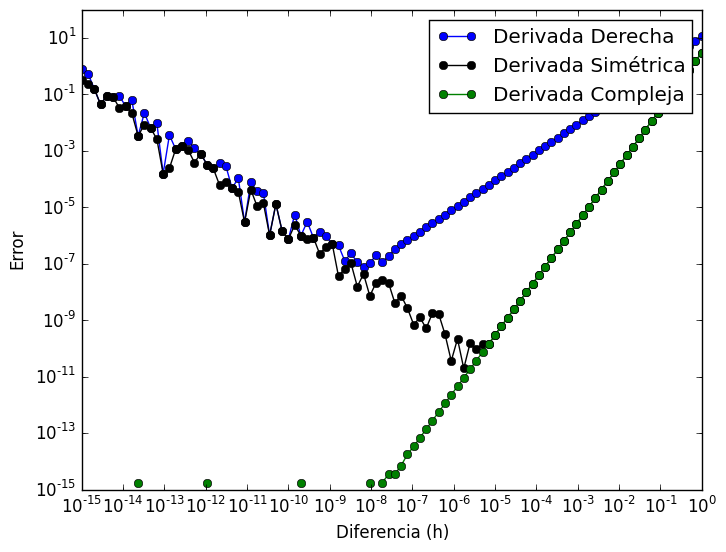

In [75]:
loglog(x,y, marker="o",color="blue",label="Derivada Derecha")
loglog(x,z, marker="o",color="black",label="Derivada Simétrica")
loglog(x,w, marker="o",color="green",label="Derivada Compleja")
xlabel("Diferencia (h)")
ylabel("Error")
legend()
show()

Como se puede observar en las gráficas anteriores, el error en la derivada compleja coincide con el error en la derivada simétrica, al menos para esta función. Esto se puede comprobar de manera similar que en los casos anteriores. Dado que:

$$ \frac{x+ih}{h}\ =\ \frac{3(x+ih)^3-2}{h}\ =\ \frac{3(x^3+3x^2ih+3x(ih)^2+(ih)^3-2)}{h}\ =\ \frac{3(x^3+i3x^2h-3xh^2-ih^3-2)}{h} $$

se puede ver que el error para f(x) esta dado por:

$$e(x,h)=\Im\Big(\frac{f(x+ i h)}{h}\Big)-f´(x)=\Im\Big(\frac{3(x^3+i3x^2h-3xh^2-ih^3-2)}{h}\Big)-9x^2=9x^2-3h^2-9x^2=-3h^2$$

Esto coincide con el error para la derivada simétrica a la hora de obtener el valor absoluto

Sin embargo, se observa que el error en la derivada compleja no aumenta a partir de un valor en particular; el error permanece constante. Esto se puede atribuir a que los valores reales flotantes se promueven a complejos; se pasa de `Float64` a `Complex128`. Además, la derivada compleja realiza menos operaciones en la componenete de interés (imaginaria) que la derivada simétrica (en la real). Es decir, la derivada compleja realiza los siguientes cálculos sobre la parte imaginaria:

$$\frac{3(3x^2h-h^3)}{h}$$

Por otro lado, la derivada simétrica realiza más operaciones:

$$\frac{3(x+h)^3-2 -(3(x-h)^3-2)}{2h}$$

Esto puede propiciar a que el error numérico se propague en los cálculos.

## Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

**Respuesta:** Como se discutió previamente, la derivada simétrica y la derivada compleja resultan en el mismo error, i.e. tienen el mismo grado de exactitud con respecto a la derivada exacta. Esto podría variar en términos de la función que se implemente,pero para el caso de $f(x)=3x^3-2$ se obtiene exactamente el mismo error. Aún así, podría haber pequeños errores numéricos debido a la conversión de los números a complejos y de vuelta a reales. 

Recordamos que los errores en las derivadas estan dados para los distintos métodos como:

Derivada Derecha:   $9xh+h^2$

Derivada Simétrica: $3h^2$

Derivada Compleja: $-3h^2$

Esto significa que en la derivada derecha, la convergencia depende también del punto de evaluación $x_0$ y que la derivada converge hacia el valor exacto conforme a $h$. Por el contrario, en el caso de la derivada compleja, la convergencia ocurre en forma independiente del valor de $x_0$ y, además ocurre conforme a $h^2$

- ¿Qué comportamiento de las derivadas en términos de $h$ nos incomoda (en lo más profundo de las entrañas)? ¿A qué se debe esto?

**Respuesta:**Se bede ser cuidadoso en el tipo de números que se utilizan en los cálculos ya que se puede perder exactitud al calcular la derivada cuando h llega a ser del órden de 10^-10. Esto también puede ocasionar que el error no disminuya conforme a h, lo cual es increíblemente incómodo. Por ejemplo, al tomar $h$  como `Float64` se debe tener en cuenta que el error no disminuye indeterminadamente conforme $h$ lo hace.